Topic:        Challenge Set 1 (MTA Subway Turnstile Data - 

Subject:      Explore MTA turnstile data

Date:         09/29/2018

Name:         Brenner Heintz


In [1]:
import pandas as pd
import numpy as np
import random
import itertools
import calendar
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
%xmode

Exception reporting mode: Verbose


In [3]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [4]:
sns.set_context('notebook', font_scale=1.2)

In [5]:
%config InlineBackend.figure_format = 'svg'

Downloaded data from: http://web.mta.info/developers/turnstile.html

Downloaded 3 weeks of data:
Saturday, September 22, 2018
Saturday, September 15, 2018
Saturday, September 08, 2018

Documentation at: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

Map of the MTA system: http://web.mta.info/maps/submap.html

**Challenge 1**

Open up a new IPython notebook

Download a few MTA turnstile data files  

Open up a file, use csv reader to read it and ensure there is a column for each feature (C/A, UNIT, SCP, STATION). These are the first four columns.  

In [6]:
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180908.txt')

In [7]:
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180915.txt')

In [8]:
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180922.txt')

In [43]:
frames = [df1, df2, df3]
df = pd.concat(frames)

In [44]:
df.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592752 entries, 0 to 199101
Data columns (total 11 columns):
C/A                                                                     592752 non-null object
UNIT                                                                    592752 non-null object
SCP                                                                     592752 non-null object
STATION                                                                 592752 non-null object
LINENAME                                                                592752 non-null object
DIVISION                                                                592752 non-null object
DATE                                                                    592752 non-null object
TIME                                                                    592752 non-null object
DESC                                                                    592752 non-null object
ENTRIES                           

In [45]:
df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2018,00:00:00,REGULAR,6743736,2285840
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2018,04:00:00,REGULAR,6743756,2285844


**Challenge 2**

"Let's turn this into a time series. Create a new column that specifies the date and time of each entry."

In [46]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
# df['DATETIME'] = pd.to_datetime(df.DATE + ' ' + df.TIME, format='%m/%d/%Y')

**Challenge 3**

These counts are for every n hours. (What is n?) We want total daily entries.

In [47]:
df['STATION_KEY'] = df['C/A'] + ' ' + df['UNIT'] + ' ' + df['STATION']

In [48]:
df['EXITS'] = df['EXITS                                                               ']
df.drop('EXITS                                                               ', axis=1, inplace=True)

In [49]:
# Reset index because index was duplicated on all 3 original dataframes
df.reset_index(inplace=True)

In [50]:
df['ENTRY_DIFFS'] = df.groupby(['STATION_KEY','SCP'])['ENTRIES'].diff(periods=-1)*-1

In [51]:
df['EXIT_DIFFS'] = df.groupby(['STATION_KEY','SCP'])['EXITS'].diff(periods=-1)*-1

In [52]:
df['TOTAL'] = df['ENTRY_DIFFS'] + df['EXIT_DIFFS']

In [112]:
df = df[(df['ENTRY_DIFFS'] < 2E5) 
              & (df['ENTRY_DIFFS'] > 0) 
              & (df['EXIT_DIFFS'] < 2E5)
              & (df['EXIT_DIFFS'] > 0)]

In [53]:
df.head(1)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,STATION_KEY,EXITS,ENTRY_DIFFS,EXIT_DIFFS,TOTAL
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-09-01,00:00:00,REGULAR,6743736,A002 R051 59 ST,2285840,20.0,4.0,24.0


In [54]:
df.groupby(['STATION_KEY', 'SCP','DATE'])['ENTRY_DIFFS'].sum()

STATION_KEY               SCP       DATE      
A002 R051 59 ST           02-00-00  2018-09-01     711.0
                                    2018-09-02     530.0
                                    2018-09-03     589.0
                                    2018-09-04    1281.0
                                    2018-09-05    1391.0
                                    2018-09-06    1440.0
                                    2018-09-07    1416.0
                                    2018-09-08     698.0
                                    2018-09-09     462.0
                                    2018-09-10    1167.0
                                    2018-09-11    1362.0
                                    2018-09-12    1416.0
                                    2018-09-13    1530.0
                                    2018-09-14    1490.0
                                    2018-09-15     732.0
                                    2018-09-16     422.0
                                    2018-

**Challenge 4**

Now plot the daily time series for a turnstile.

In [55]:
x = df.groupby(['STATION_KEY', 'SCP','DATE'])['ENTRY_DIFFS'].sum()

In [56]:
x = pd.DataFrame(x)

In [57]:
x.reset_index(inplace=True)

In [58]:
x.head(2)

,STATION_KEY,SCP,DATE,ENTRY_DIFFS
0,A002 R051 59 ST,02-00-00,2018-09-01,711.0
1,A002 R051 59 ST,02-00-00,2018-09-02,530.0


In [59]:
x_values = x[(x['SCP']=='02-00-00') & (x['STATION_KEY']=='A002 R051 59 ST')]['DATE']

In [60]:
y_values = x[(x['SCP']=='02-00-00') & (x['STATION_KEY']=='A002 R051 59 ST')]['ENTRY_DIFFS']

In [61]:
y_values = y_values.astype(int)

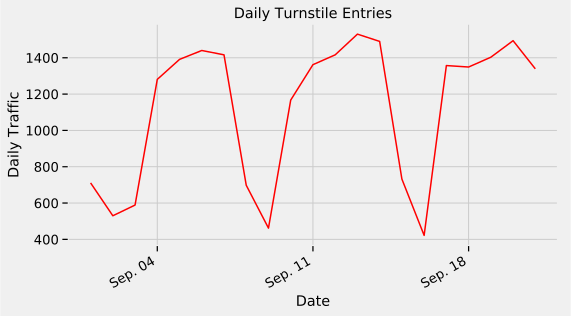

In [62]:
fig, ax = plt.subplots()

fig.set_size_inches(8,4)

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b. %d'))

ax.set_xlabel('Date')
ax.set_ylabel('Daily Traffic')
ax.set_title('Daily Turnstile Entries')

plt.tight_layout()

plt.plot(x_values,y_values, linewidth=1.5, color='r')

**Challenge 5**


We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [63]:
df.head(3)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,STATION_KEY,EXITS,ENTRY_DIFFS,EXIT_DIFFS,TOTAL
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-09-01,00:00:00,REGULAR,6743736,A002 R051 59 ST,2285840,20.0,4.0,24.0
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-09-01,04:00:00,REGULAR,6743756,A002 R051 59 ST,2285844,13.0,29.0,42.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-09-01,08:00:00,REGULAR,6743769,A002 R051 59 ST,2285873,86.0,73.0,159.0


In [64]:
df['UNIT'].nunique()

458

In [65]:
df.groupby(['C/A', 'UNIT', 'SCP', 'DATE']).sum()

index   ENTRIES     EXITS  ENTRY_DIFFS  \
C/A   UNIT SCP      DATE                                                   
A002  R051 02-00-00 2018-09-01       15  40463492  13715548        711.0   
                    2018-09-02       51  40467523  13716840        530.0   
                    2018-09-03       87  40470803  13718028        589.0   
                    2018-09-04      123  40475187  13720200       1281.0   
                    2018-09-05      159  40483130  13723586       1391.0   
                    2018-09-06      195  40491449  13726574       1440.0   
                    2018-09-07      231  40500114  13729661       1416.0   
                    2018-09-08       15  40507658  13731874        698.0   
                    2018-09-09       51  40511465  13732974        462.0   
                    2018-09-10       87  40515127  13734682       1167.0   
                    2018-09-11      123  40522355  13737419       1362.0   
                    2018-09-12      159  40530744  13740430       1416.0   
                    2018-09-13      195  40539325  13743739       1530.0   
                    2018-09-14      231  40548446  13746946       1490.0   
                    2018-09-15       15  40556380  13749021        732.0   
                    2018-09-16       51  40560412  13749911        422.0   
                    2018-09-17       87  40564062  13751545       1357.0   
                    2018-09-18      123  40572288  13754603       1349.0   
                    2018-09-19      159  40580458  13757446       1403.0   
                    2018-09-20      231  47353483  16053469       1494.0   
                    2018-09-21      237  40598016  13763439       1339.0   
           02-00-01 2018-09-01      267  36197744   8105973        639.0   
                    2018-09-02      303  36201298   8106659        459.0   
                    2018-09-03      339  36204070   8107245        480.0   
                    2018-09-04      375  36207661   8108355       1020.0   
                    2018-09-05      411  36213933   8110132       1061.0   
                    2018-09-06      447  36220487   8111739       1200.0   
                    2018-09-07      483  36227570   8113435       1153.0   
                    2018-09-08      267  36233597   8114696        556.0   
                    2018-09-09      303  36236810   8115362        412.0   
...                                 ...       ...       ...          ...   
TRAM2 R469 00-05-00 2018-09-13  1187649     16848       372          0.0   
                    2018-09-14  1187685     16852       372          1.0   
                    2018-09-15  1194123     16854       372          0.0   
                    2018-09-16  1194159     16854       372          0.0   
                    2018-09-17  1194195     16854       372          0.0   
                    2018-09-18  1194231     16854       372          0.0   
                    2018-09-19  1194267     16856       372          1.0   
                    2018-09-20  1194303     16860       372          0.0   
                    2018-09-21  1194339     16862       372          1.0   
           00-05-01 2018-09-01  1173705     33324      2088          0.0   
                    2018-09-02  1173741     33324      2088          0.0   
                    2018-09-03  1173777     33324      2088          0.0   
                    2018-09-04  1173813     33324      2088          0.0   
                    2018-09-05  1173849     33324      2088          0.0   
                    2018-09-06  1173885     33324      2088          0.0   
                    2018-09-07  1173921     33324      2088          0.0   
                    2018-09-08  1187721     33324      2088          0.0   
                    2018-09-09  1187757     33324      2088          0.0   
                    2018-09-10  1187793     33324      2088          0.0   
                    2018-09-11  1187829     33324      2088          0.0   
      

**Challenge 6**

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [66]:
station_df = df.groupby(['STATION', 'DATE']).sum()

In [67]:
station_df.reset_index(inplace=True)

**Challenge 7**

Plot the time series (either daily or your preferred level of granularity) for a station.

In [68]:
x_values = station_df[station_df['STATION'] == '1 AV']['DATE']

In [69]:
y_values = station_df[station_df['STATION'] == '1 AV']['TOTAL']
y_values = y_values.astype(int)

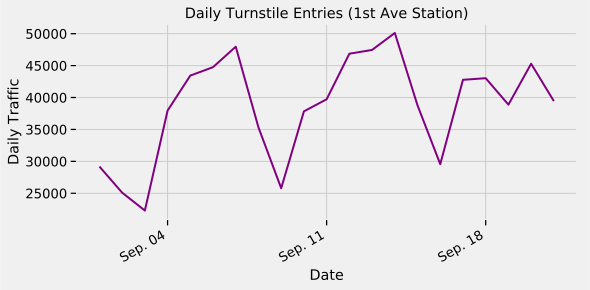

In [70]:
fig, ax = plt.subplots()

fig.set_size_inches(8,4)

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b. %d'))

ax.set_xlabel('Date')
ax.set_ylabel('Daily Traffic')
ax.set_title('Daily Turnstile Entries (1st Ave Station)')

# plt.tight_layout()

dates = mdates.date2num(x_values)
plt.plot_date(dates, y_values, fmt='-', color='purple', linewidth=2);

**Challenge 8**

Select a station and find the total daily counts for this station. Then plot those daily counts for each week separately.

To clarify: if I have 10 weeks of data on the 28th st 6 station, I will add 10 lines to the same figure (e.g. running plt.plot(week_count_list) once for each week). Each plot will have 7 points of data.

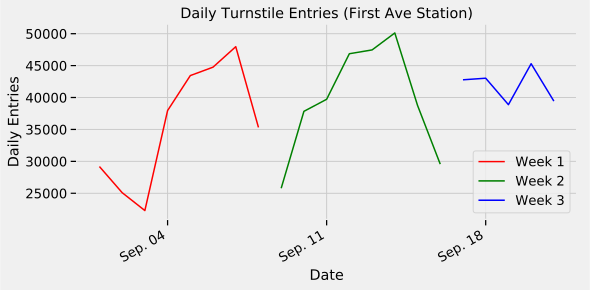

In [71]:
fig, ax = plt.subplots()

fig.set_size_inches(8,4)

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b. %d'))

ax.set_xlabel('Date')
ax.set_ylabel('Daily Entries')
ax.set_title('Daily Turnstile Entries (First Ave Station)')

plt.plot(x_values[:8],y_values[:8], linewidth=1.5, color='r')
plt.plot(x_values[8:16],y_values[8:16], linewidth=1.5, color='g')
plt.plot(x_values[16:24],y_values[16:24], linewidth=1.5, color='b')
plt.legend(labels=['Week 1', 'Week 2', 'Week 3'], loc='best')

**Challenge 9**


Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate



In [151]:
total_ridership_counts = df.groupby('STATION').sum()

In [152]:
total_ridership_counts.reset_index(inplace=True)

In [165]:
total_ridership_counts.head(3)

,STATION,index,ENTRIES,EXITS,ENTRY_DIFFS,EXIT_DIFFS,TOTAL
0,1 AV,36628668,370490365431,198307825812,386963.0,424453.0,811416.0
1,103 ST,238821167,19207992900,74504748053,543685.0,375046.0,918731.0
2,103 ST-CORONA,203782228,8367157140,8555536724,351581.0,249739.0,601320.0


**Challenge 10**

Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

In [159]:
y_vals = total_ridership_counts['TOTAL']

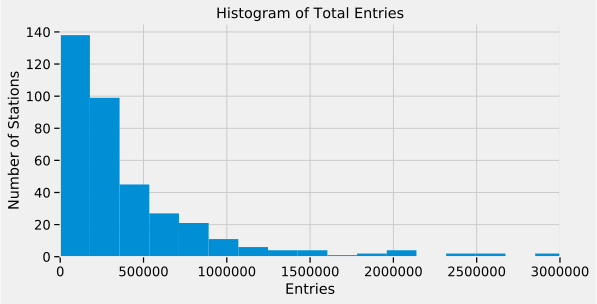

In [163]:
fig, ax = plt.subplots()

fig.set_size_inches(8,4)

ax.set_xlabel('Entries')
ax.set_ylabel('Number of Stations')
ax.set_title('Histogram of Total Entries')

ax.set_xlim(0,3000000)

plt.ticklabel_format(style='plain', axis='x')
plt.hist(y_vals, bins=30);